<a href="https://colab.research.google.com/github/razkalfon/FIFA_data_analysis/blob/main/FIFA_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

התקנת קאגל והגדרת מפתח api


In [ ]:
import json
import os
!pip install kaggle
api_token = {"username":"meirhaimov","key":"40b487225f2482c90f8b651e4848dc14"}
!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

הורדת הפיפא וחילוצה מקובץ זיפ אל תוך הספרייה

In [ ]:
!mkdir -p ./datasets/fifa-20-complete-player-dataset

!kaggle datasets download stefanoleone992/fifa-20-complete-player-dataset -p ./datasets/fifa-20-complete-player-dataset
%cd ./datasets/fifa-20-complete-player-dataset
!unzip fifa-20-complete-player-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/stefanoleone992/fifa-20-complete-player-dataset
License(s): CC0-1.0
 48% 7.00M/14.5M [00:00<00:00, 72.3MB/s]
100% 14.5M/14.5M [00:00<00:00, 90.6MB/s]
/content/datasets/fifa-20-complete-player-dataset
Archive:  fifa-20-complete-player-dataset.zip
  inflating: players_15.csv          
  inflating: players_16.csv          
  inflating: players_17.csv          
  inflating: players_18.csv          
  inflating: players_19.csv          
  inflating: players_20.csv          
  inflating: teams_and_leagues.csv   


In [ ]:
import sqlite3
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
%matplotlib inline
CSV_PATH = '/content/datasets/fifa-20-complete-player-dataset/players_16.csv'
conn = sqlite3.connect(CSV_PATH)

יצירת DataFrame מ-CSV ושמירתו למסד נתונים ב-SQLite

In [ ]:
import pandas as pd
import sqlite3
import os
CSV_PATH = '/content/datasets/fifa-20-complete-player-dataset/players_16.csv'
df = pd.read_csv(CSV_PATH)
conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
df.to_sql('players', conn, if_exists='replace', index=False)

14881

פונקצייה ליצירת כותרת

In [ ]:
def df_with_titles(results, c):
    column_names = [description[0] for description in c.description]
    return pd.DataFrame(results, columns=column_names)

** השוואה בין שחקנים מצטיינים לשחקנים ממוצעים**

השוואה 1.1 -  השוואה בין ששת התכונות העייקריות בין שחקנים מצטיינים לשחקנים רגילים, לפי ממוצע.

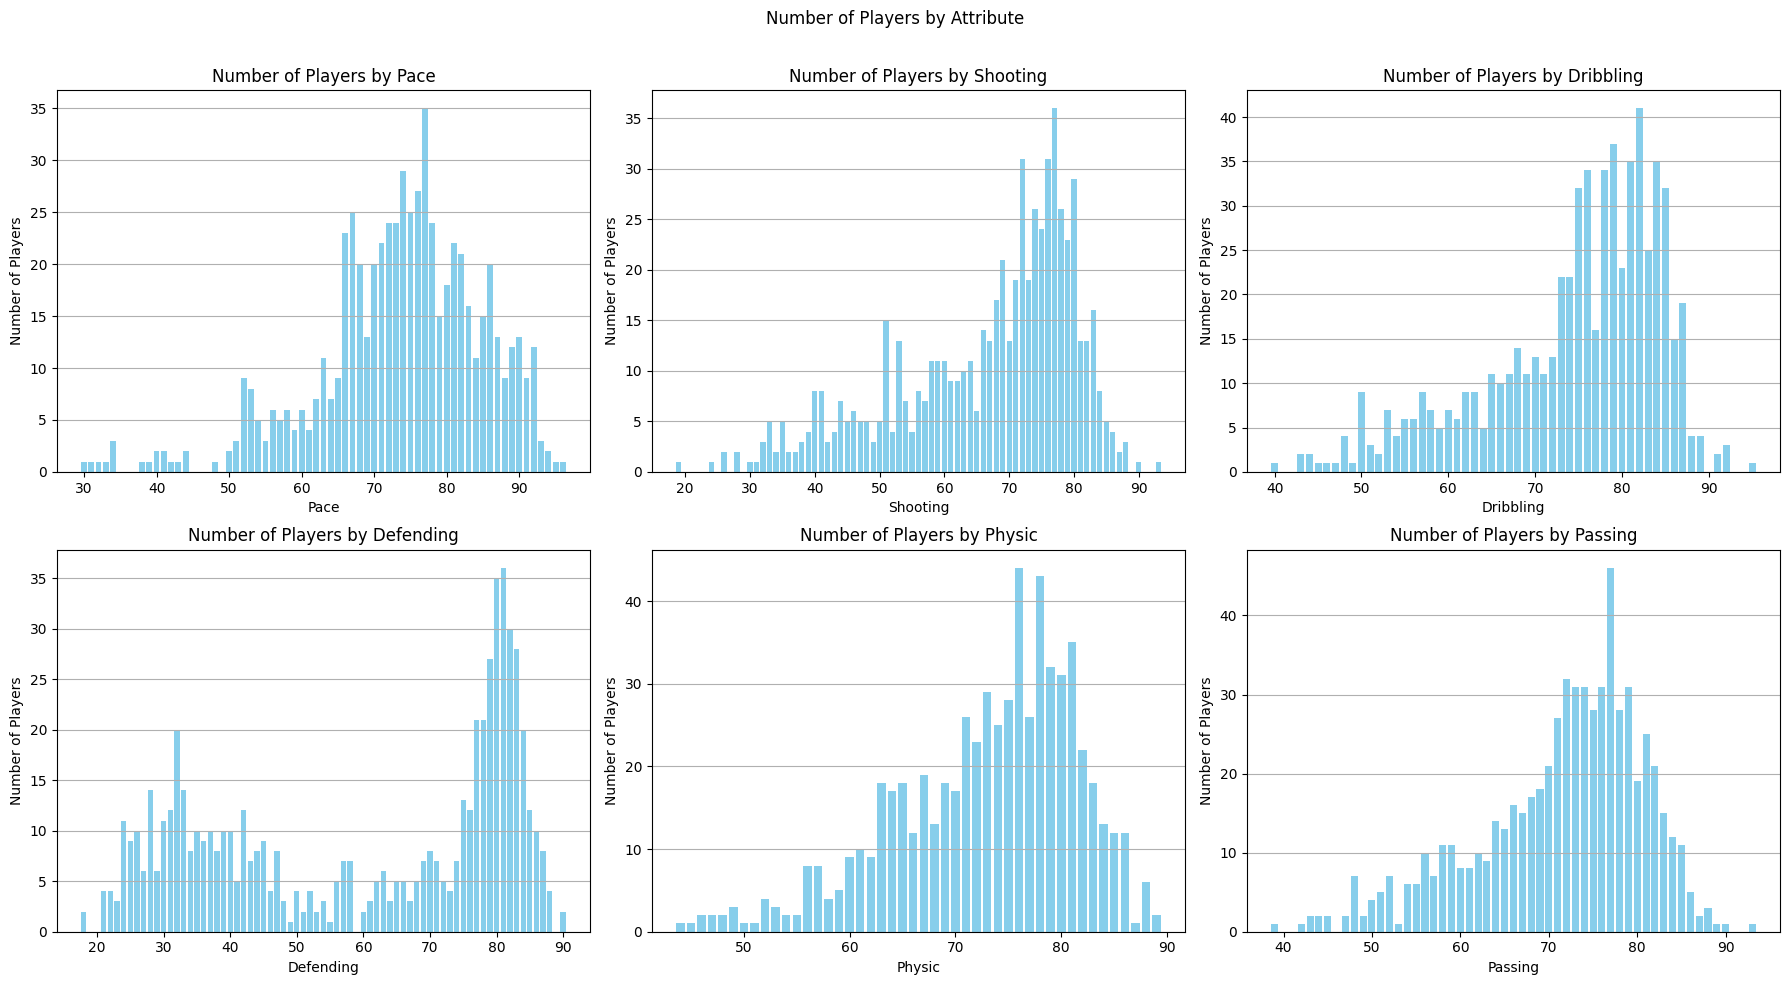

In [ ]:
conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
c = conn.cursor()
attributes = ['pace', 'shooting', 'dribbling', 'defending', 'physic', 'passing']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Number of Players by Attribute')

for i, attribute in enumerate(attributes):
    query = f"""
        SELECT {attribute}, COUNT(*) as player_count
        FROM players
        WHERE overall > 77
        GROUP BY {attribute}
        ORDER BY {attribute}
    """
    results = c.execute(query).fetchall()
    df = pd.DataFrame(results, columns=[attribute, 'player_count'])

    ax = axs[i // 3, i % 3]
    ax.bar(df[attribute], df['player_count'], color='skyblue')
    ax.set_xlabel(attribute.capitalize())
    ax.set_ylabel('Number of Players')
    ax.set_title(f'Number of Players by {attribute.capitalize()}')
    ax.grid(axis='y')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

conn.close()


השוואה 1.2 -  בדיקת השחקנים מצטיינים לפי עמדות

נבדוק מהו הדירוג הממוצע של שחקן ומהו הדירוג של השחקנים המצטיינים


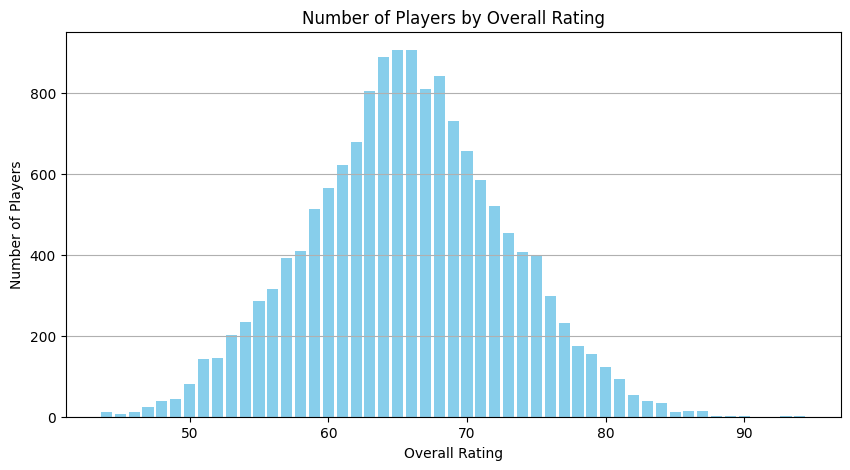

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
c = conn.cursor()

query_overall = """
    SELECT overall, COUNT(*) as player_count
    FROM players
    GROUP BY overall
    ORDER BY overall
"""
results_overall = c.execute(query_overall).fetchall()
df_overall = pd.DataFrame(results_overall, columns=['overall', 'player_count'])
plt.figure(figsize=(10, 5))
plt.bar(df_overall['overall'], df_overall['player_count'], color='skyblue')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.title('Number of Players by Overall Rating')
plt.grid(axis='y')
plt.show()
conn.close()


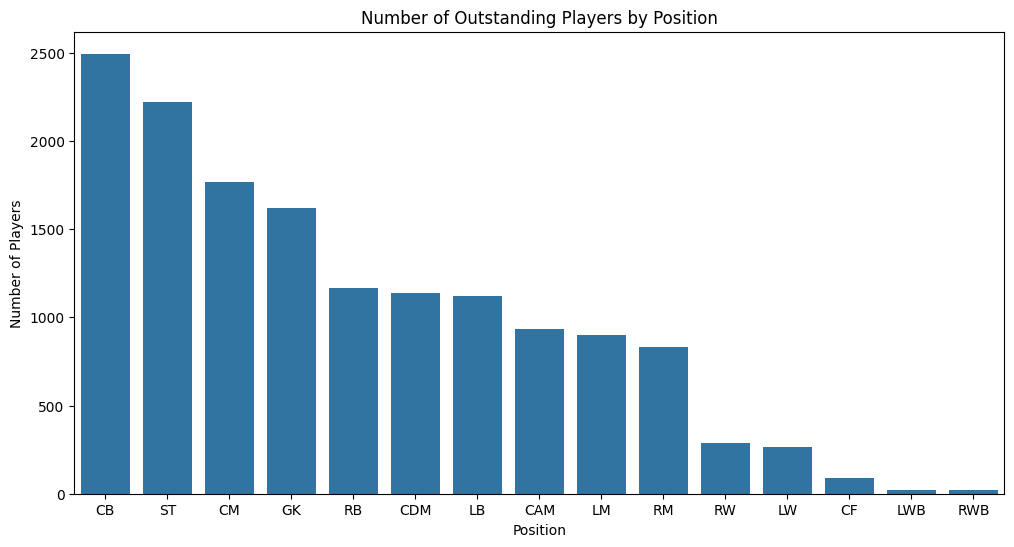

In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
c = conn.cursor()
#האם לעשות פה מעל 77?
#לשאול את רז
results_outstanding = c.execute("""
    SELECT short_name, overall, player_positions
    FROM players
    WHERE overall
    """).fetchall()
df_outstanding = pd.DataFrame(results_outstanding, columns=[desc[0] for desc in c.description])

conn.close()

df_outstanding['primary_position'] = df_outstanding['player_positions'].apply(lambda x: x.split(',')[0].strip())

position_counts = df_outstanding['primary_position'].value_counts().reset_index()
position_counts.columns = ['Position', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Position', y='Count', data=position_counts)
plt.title('Number of Outstanding Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()


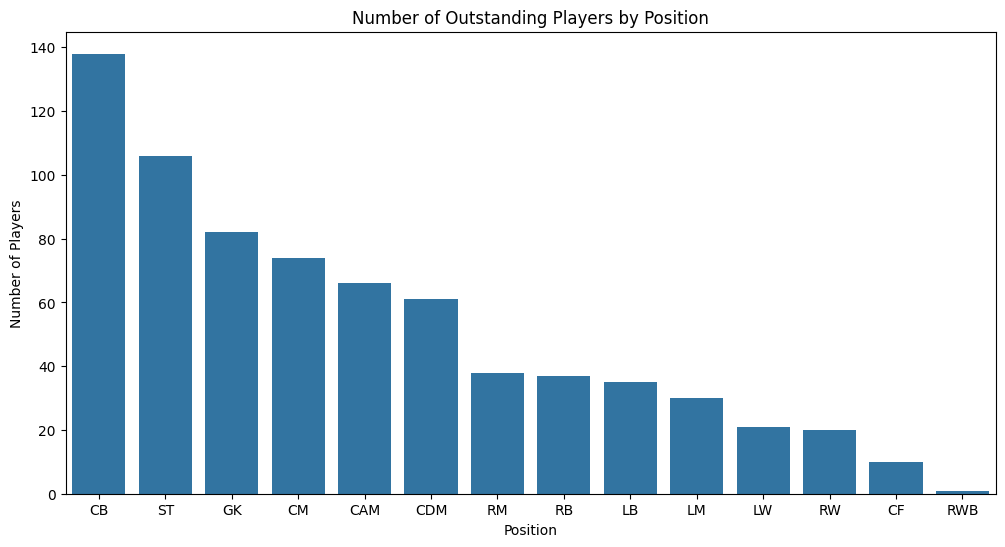

In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
c = conn.cursor()
#האם לעשות פה מעל 77?
#לשאול את רז
results_outstanding = c.execute("""
    SELECT short_name, overall, player_positions
    FROM players
    WHERE overall > 77
    """).fetchall()
df_outstanding = pd.DataFrame(results_outstanding, columns=[desc[0] for desc in c.description])

conn.close()

df_outstanding['primary_position'] = df_outstanding['player_positions'].apply(lambda x: x.split(',')[0].strip())

position_counts = df_outstanding['primary_position'].value_counts().reset_index()
position_counts.columns = ['Position', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Position', y='Count', data=position_counts)
plt.title('Number of Outstanding Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()


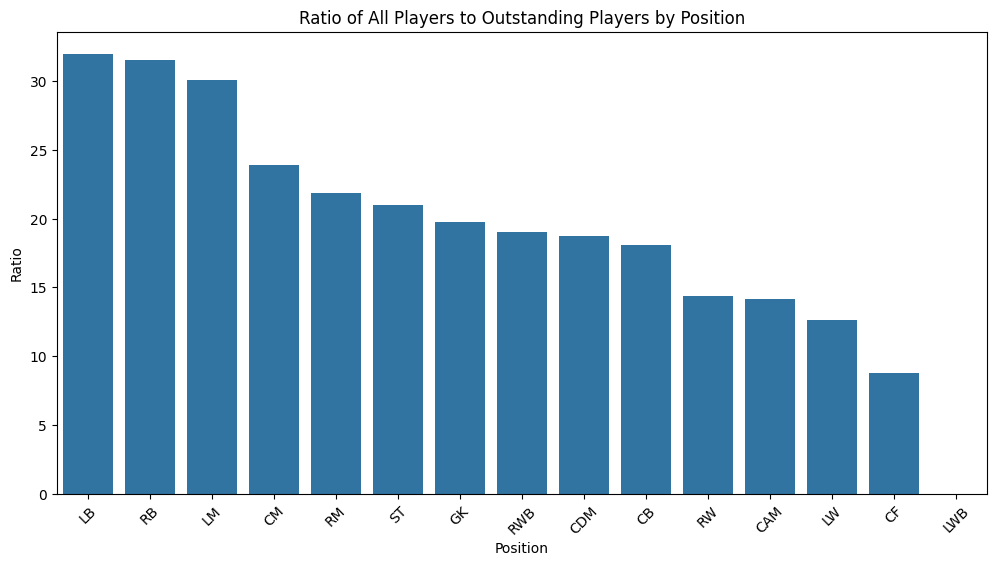

In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# התחברות למסד הנתונים
conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
c = conn.cursor()

# קבלת נתונים של כל השחקנים
results_all = c.execute("""
    SELECT short_name, player_positions
    FROM players
    """).fetchall()
df_all = pd.DataFrame(results_all, columns=[desc[0] for desc in c.description])

# קבלת נתונים של שחקנים מצטיינים (מעל 77)
results_outstanding = c.execute("""
    SELECT short_name, overall, player_positions
    FROM players
    WHERE overall > 77
    """).fetchall()
df_outstanding = pd.DataFrame(results_outstanding, columns=[desc[0] for desc in c.description])

conn.close()

# הגדרת העמדה הראשית
df_all['primary_position'] = df_all['player_positions'].apply(lambda x: x.split(',')[0].strip())
df_outstanding['primary_position'] = df_outstanding['player_positions'].apply(lambda x: x.split(',')[0].strip())

# חישוב מספר השחקנים בכל עמדה
position_counts_all = df_all['primary_position'].value_counts().reset_index()
position_counts_all.columns = ['Position', 'Count_All']

position_counts_outstanding = df_outstanding['primary_position'].value_counts().reset_index()
position_counts_outstanding.columns = ['Position', 'Count_Outstanding']

# חיבור הנתונים של כל השחקנים והמצטיינים
position_counts = pd.merge(position_counts_all, position_counts_outstanding, on='Position', how='left')
position_counts['Count_Outstanding'] = position_counts['Count_Outstanding'].fillna(0)

# חישוב היחס בין כל השחקנים לשחקנים המצטיינים
# אם Count_Outstanding הוא 0, אנו רוצים למנוע חלוקה באפס ולהגדיר את היחס ל-0
position_counts['Ratio'] = position_counts.apply(lambda row: row['Count_All'] / row['Count_Outstanding'] if row['Count_Outstanding'] != 0 else 0, axis=1)

# מיון הנתונים לפי היחס
position_counts = position_counts.sort_values(by='Ratio', ascending=False)

# הצגת הגרף
plt.figure(figsize=(12, 6))
sns.barplot(x='Position', y='Ratio', data=position_counts)
plt.title('Ratio of All Players to Outstanding Players by Position')
plt.xlabel('Position')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.show()


לשאול את אביעד על כפלי קוד

נושא 2- מימוש פונציאל של שחקנים צעירים עם יכולות משחק גבוהות לגילם

In [ ]:
conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
c = conn.cursor()
results = c.execute("""
    SELECT nationality, COUNT(nationality)
    FROM players
    WHERE age < 22 and overall >70
    GROUP BY nationality
    ORDER BY COUNT(nationality) DESC
""").fetchmany(10)


results_with_titles = df_with_titles(results, c)
results_with_titles

,nationality,COUNT(nationality)
0,Spain,38
1,Netherlands,22
2,Germany,20
3,France,20
4,Portugal,19
5,Brazil,19
6,England,15
7,Italy,14
8,Belgium,13
9,Argentina,13


השפעת הנבחרת

In [ ]:
import pandas as pd
import sqlite3
#רז מה זה?

conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
c = conn.cursor()

results = c.execute("""
    SELECT count(nationality),nationality
    FROM players
    WHERE age < 22 and overall >70
    group by nationality
    order by count(nationality) desc
""").fetchall()


results_with_titles = df_with_titles(results, c)

df_potenial_2016 = pd.DataFrame(results_with_titles)
df_potenial_2016


,count(nationality),nationality
0,38,Spain
1,22,Netherlands
2,20,Germany
3,20,France
4,19,Portugal
5,19,Brazil
6,15,England
7,14,Italy
8,13,Belgium
9,13,Argentina


כעת, אנחנו רוצים לבדוק האם בשנת 2020 הפוטנציאל שלהם אכן התממש.

In [ ]:
import sqlite3
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
%matplotlib inline
CSV_PATH2020 = '/content/datasets/fifa-20-complete-player-dataset/players_20.csv'
conn2020 = sqlite3.connect(CSV_PATH2020)
df2020 = pd.read_csv(CSV_PATH2020)


conn2020 = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite2020')
df2020.to_sql('players2020', conn2020, if_exists='replace', index=False)

18278

In [ ]:
conn2020 = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite2020')
d = conn2020.cursor()
def df_with_titles2020(results2020, d):
    column_names = [description[0] for description in d.description]


    return pd.DataFrame(results2020, columns=column_names)


In [ ]:
results2020 = d.execute("""
    SELECT *
    FROM players2020
    """).fetchall()
df2020 = df_with_titles2020(results2020=results2020, d=d)
df2020


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,None,None,None,None,None,None,None,None,None,None
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [ ]:
#conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
#c = conn.cursor()
#רז הורדתי את הדירוג האישי שהיה מעל 70
results = c.execute("""
    SELECT short_name, age, club , overall, potential
    FROM players
    WHERE age < 22
""").fetchall()

df_potenial_2016 = pd.DataFrame(results, columns=['short_name', 'age','club', 'overall_2016', 'potential'])

df2020 = pd.read_csv('/content/datasets/fifa-20-complete-player-dataset/players_20.csv')

df2020 = df2020[['short_name', 'overall']].rename(columns={'overall': 'overall_2020'})

df_combined = pd.merge(df_potenial_2016, df2020, on='short_name', how='inner')

output_db_path = '/content/datasets/combined_fifa_players.csv'
conn_output = sqlite3.connect(output_db_path)

df_combined.to_sql('players_combined', conn_output, if_exists='replace', index=False)

#conn_output.close()

#print(f'The combined data has been saved to {output_db_path}')


2716

In [ ]:
conn_2016and2020 = sqlite3.connect('/content/datasets/combined_fifa_players.csv')
c_2016and2020 = conn_2016and2020.cursor()
results_2016and2020 = c_2016and2020.execute("""
    SELECT *
    FROM players_combined
""").fetchall()
df_2016and2020 = pd.DataFrame(results_2016and2020, columns=[desc[0] for desc in c_2016and2020.description])
df_2016and2020


,short_name,age,club,overall_2016,potential,overall_2020
0,A. Laporte,21,Athletic Club de Bilbao,83,87,87
1,R. Sterling,20,Manchester City,82,88,88
2,M. Depay,21,Manchester United,81,89,84
3,Marquinhos,21,Paris Saint-Germain,81,87,86
4,Paco Alcácer,21,Valencia CF,80,88,83
...,...,...,...,...,...,...
2711,E. Farrell,17,Drogheda United,45,61,51
2712,M. Lowe,19,Cambridge United,45,55,69
2713,S. Sargeant,17,Leyton Orient,44,63,52
2714,R. Feely,18,St. Patrick's Athletic,44,61,56


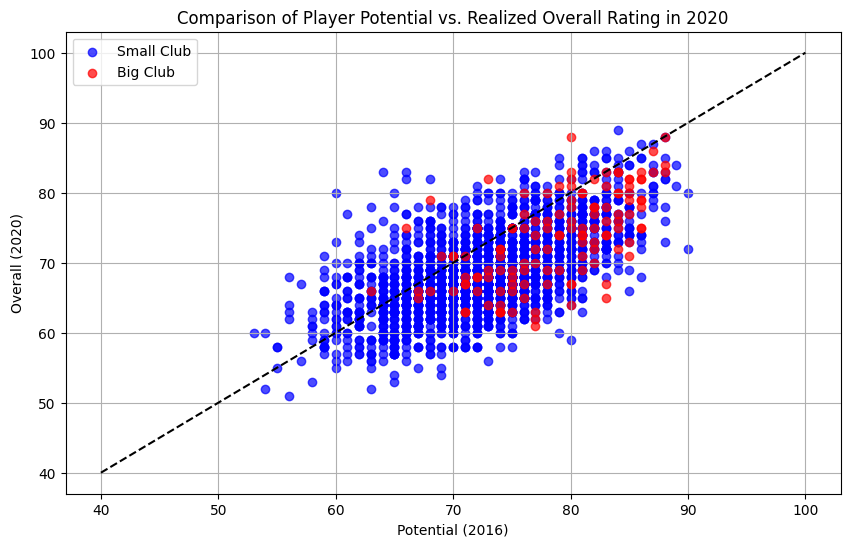

In [ ]:
df_potenial_2016 = pd.read_csv('/content/datasets/fifa-20-complete-player-dataset/players_16.csv')
df_potenial_2016 = df_potenial_2016[(df_potenial_2016['age'] < 22) ]
df_potenial_2016 = df_potenial_2016[['sofifa_id', 'short_name', 'age', 'club', 'overall', 'potential']].rename(columns={'overall': 'overall_2016'})

df2020 = pd.read_csv('/content/datasets/fifa-20-complete-player-dataset/players_20.csv')
df2020 = df2020[['sofifa_id', 'short_name', 'overall']].rename(columns={'overall': 'overall_2020'})

df_combined = pd.merge(df_potenial_2016, df2020, on='sofifa_id', how='inner')

# רשימת מועדונים גדולים
big_clubs = ["Manchester City", "Real Madrid", "Inter", "Arsenal", "Bayer 04 Leverkusen", "Liverpool",
    "FC Barcelona", "Atalanta", "Borussia Dortmund", "RB Leipzig", "Paris Saint-Germain",
    "FC Bayern Mֳ¼nchen", "Sporting CP", "VfB Stuttgart", "PSV", "Atlֳ©tico Madrid", "FC Porto",
    "Girona FC", "Feyenoord", "SL Benfica","Milan"]

df_combined['color'] = df_combined['club'].apply(lambda x: 'red' if x in big_clubs else 'blue')

plt.figure(figsize=(10, 6))
for color in df_combined['color'].unique():
    subset = df_combined[df_combined['color'] == color]
    plt.scatter(subset['potential'], subset['overall_2020'], color=color, label='Big Club' if color == 'red' else 'Small Club', alpha=0.7)

plt.plot([40, 100], [40, 100], color='black', linestyle='--')
plt.xlabel('Potential (2016)')
plt.ylabel('Overall (2020)')
plt.title('Comparison of Player Potential vs. Realized Overall Rating in 2020')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
num_red = len(df_combined[df_combined['color'] == 'red'])
num_blue = len(df_combined[df_combined['color'] == 'blue'])
num_red, num_blue

(129, 2030)

ירוק - כל השחקנים עם פוטנציאל גבוהה מתחתת לגיל 22 שהם נמצאים במועדונים הגדולים ביותר

כחול  - כל השחקנים עם פוטנציאל גבוהה מתחתת לגיל 22 שהם נמצאים במועדונים הגדולים ביותר שעברו שיפור משמעותי

צהוב - כל השחקנים עם פוטנציאל גבוהה מתחתת לגיל 22 שהם לא נמצאים במועדונים הגדולים ביותר

אדום - כל השחקנים עם פוטנציאל גבוהה מתחתת לגיל 22 שהם לא נמצאים במועדונים הגדולים ביותר שעברו שיפור משמעותי

> Add blockquote



נחפש את השחקנים עם הדירוג הנמוך ביותר


In [ ]:
player_with_specific_ratings = df_combined[(df_combined['potential'] == 60) & (df_combined['overall_2020'] == 80) & (df_combined['color'] == 'blue')]
player_with_specific_ratings

,sofifa_id,short_name_x,age,club,overall_2016,potential,short_name_y,overall_2020,color
1982,223113,K. Piątek,20,Zagłębie Lubin,54,60,K. Piątek,80,blue


In [ ]:
conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
c = conn.cursor()
results = c.execute("""
    SELECT pace,shooting,dribbling,defending,physic,passing
    FROM players
    where sofifa_id = 223113
    """).fetchall()
results = df_with_titles(results, c)
results


,pace,shooting,dribbling,defending,physic,passing
0,56.0,56.0,49.0,21.0,53.0,41.0


In [ ]:
results2020 = d.execute("""
    SELECT pace,shooting,dribbling,defending,physic,passing
    FROM players2020
    where sofifa_id = 223113
    """).fetchall()
df2020 = df_with_titles2020(results2020=results2020, d=d)
df2020

,pace,shooting,dribbling,defending,physic,passing
0,76.0,80.0,73.0,38.0,71.0,53.0


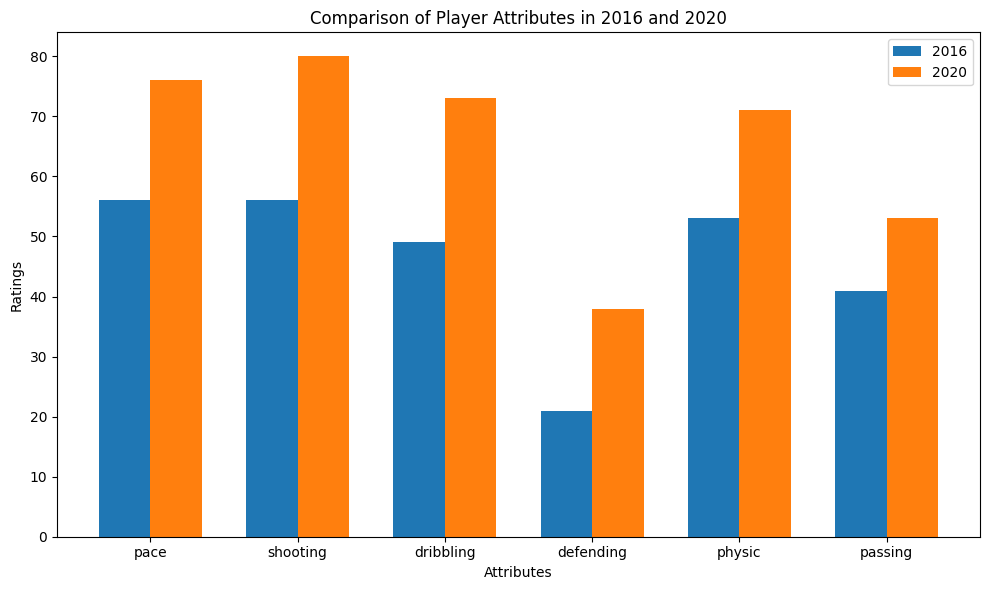

In [ ]:

columns = ['pace', 'shooting', 'dribbling', 'defending', 'physic', 'passing']
df_2016 = pd.DataFrame(results, columns=columns)
df_2020 = pd.DataFrame(results2020, columns=columns)
values_2016 = df_2016.values.flatten()
values_2020 = df_2020.values.flatten()
attributes = columns
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(attributes))

bar1 = plt.bar(index, values_2016, bar_width, label='2016')
bar2 = plt.bar([i + bar_width for i in index], values_2020, bar_width, label='2020')

plt.xlabel('Attributes')
plt.ylabel('Ratings')
plt.title('Comparison of Player Attributes in 2016 and 2020')
plt.xticks([i + bar_width / 2 for i in index], attributes)
plt.legend()

plt.tight_layout()
plt.show()
#נזכיר כי שיחק בקבוצה פולנית ב2016 וב2020 עבר לשחק במילאן.
#בין השנים 2013-2016 שיחק 72 משחקים וכבש 15
#ובשנת 2020 לבדה שיחק 36 משחקים וכבש 13


In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=0ea30b575b0a7317923b14fe7209898b49c219bb0ccdf5b1b089856b4017c1ec
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
import requests
from bs4 import BeautifulSoup

# URL של דף הוויקיפדיה של קרישטוף פיונטק
url = "https://en.wikipedia.org/wiki/Krzysztof_Piątek"

# שליחת בקשה ל-URL וקבלת תוכן הדף
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# חיפוש השורות המכילות את השנים 2013-2016 ו-2019-2020 ומספר ההופעות (apps) והשערים (Gls)
rows = soup.find_all('tr')
apps_2013_2016 = None
goals_2013_2016 = None
apps_2019_2020 = None
goals_2019_2020 = None

for row in rows:
    th = row.find('th')
    if th:
        span = th.find('span')
        if span:
            years = span.get_text(strip=True)
            if '2013–2016' in years:
                tds = row.find_all('td')
                apps_2013_2016 = tds[-2].get_text(strip=True)
                goals_2013_2016 = tds[-1].get_text(strip=True)
            if '2019–2020' in years:
                tds = row.find_all('td')
                apps_2019_2020 = tds[-2].get_text(strip=True)
                goals_2019_2020 = tds[-1].get_text(strip=True)

print(f"Apps in 2013-2016: {apps_2013_2016}")
print(f"Goals in 2013-2016: {goals_2013_2016}")
print(f"Apps in 2019-2020: {apps_2019_2020}")
print(f"Goals in 2019-2020: {goals_2019_2020}")


Apps in 2013-2016: 72
Goals in 2013-2016: (15)
Apps in 2019-2020: 36
Goals in 2019-2020: (13)


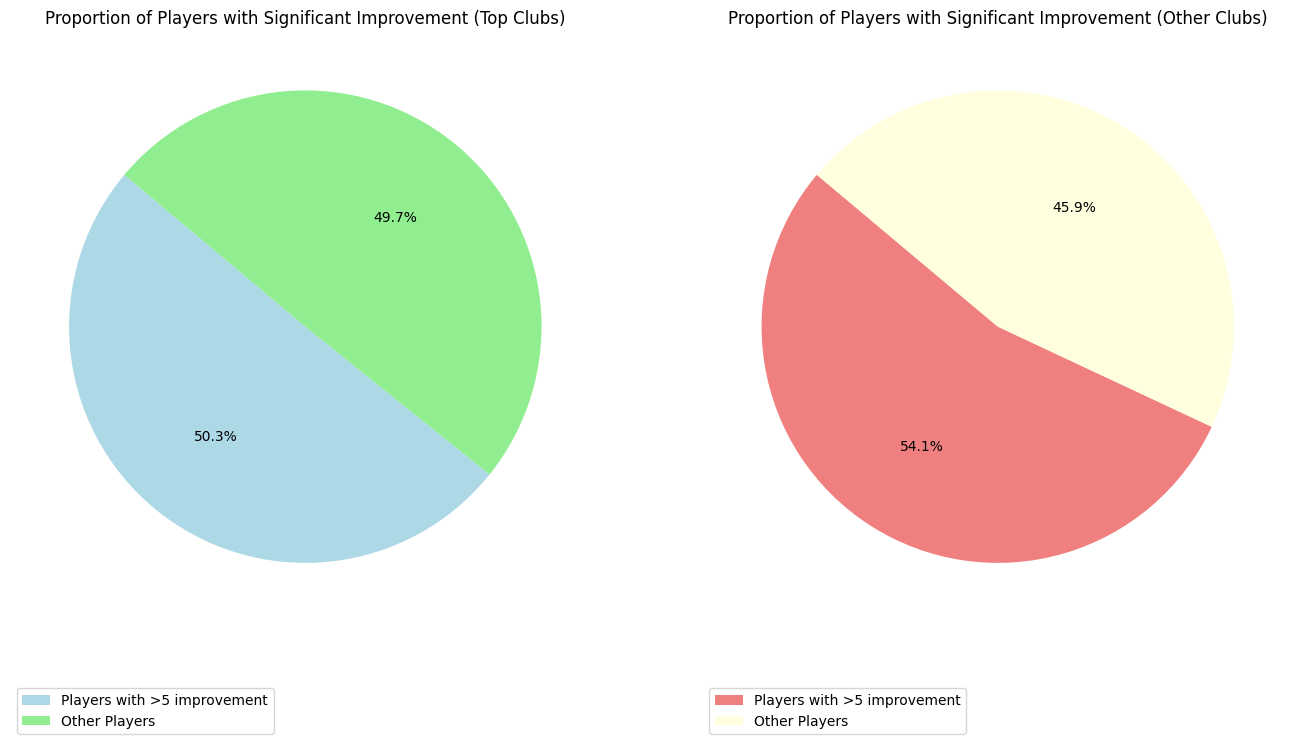

In [ ]:

def df_with_titles(results, c):
    return pd.DataFrame(results, columns=[desc[0] for desc in c.description])
conn = sqlite3.connect('/content/datasets/combined_fifa_players.csv')
c = conn.cursor()
results_with_improvement = c.execute("""
    SELECT *
    FROM players_combined
    WHERE club IN ("Manchester City", "Real Madrid", "Inter", "Arsenal", "Bayer 04 Leverkusen", "Liverpool",
    "FC Barcelona", "Atalanta", "Borussia Dortmund", "RB Leipzig", "Paris Saint-Germain",
    "FC Bayern Mֳ¼nchen", "Sporting CP", "VfB Stuttgart", "PSV", "Atlֳ©tico Madrid", "FC Porto",
    "Girona FC", "Feyenoord", "SL Benfica","Milan")
    AND overall_2020 - overall_2016 > 5
""").fetchall()
df_with_improvement = df_with_titles(results_with_improvement, c)
results_all_players = c.execute("""
    SELECT *
    FROM players_combined
    WHERE club IN ( "Manchester City", "Real Madrid", "Inter", "Arsenal", "Bayer 04 Leverkusen", "Liverpool",
                    "FC Barcelona", "Atalanta", "Borussia Dortmund", "RB Leipzig", "Paris Saint-Germain",
                    "Bayern München II", "Sporting CP", "VfB Stuttgart", "PSV", "Atlético Madrid", "FC Porto",
                    "Girona FC", "Feyenoord", "SL Benfica")
""").fetchall()
df_all_players = df_with_titles(results_all_players, c)
results_with_improvement2 = c.execute("""
    SELECT *
    FROM players_combined
    WHERE club NOT IN ( "Manchester City", "Real Madrid", "Inter", "Arsenal", "Bayer 04 Leverkusen", "Liverpool",
                    "FC Barcelona", "Atalanta", "Borussia Dortmund", "RB Leipzig", "Paris Saint-Germain",
                    "Bayern München II", "Sporting CP", "VfB Stuttgart", "PSV", "Atlético Madrid", "FC Porto",
                    "Girona FC", "Feyenoord", "SL Benfica")
    AND overall_2020 - overall_2016 > 5
""").fetchall()
df_with_improvement2 = df_with_titles(results_with_improvement2, c)
results_all_players2 = c.execute("""
    SELECT *
    FROM players_combined
    WHERE club NOT IN ( "Manchester City", "Real Madrid", "Inter", "Arsenal", "Bayer 04 Leverkusen", "Liverpool",
                    "FC Barcelona", "Atalanta", "Borussia Dortmund", "RB Leipzig", "Paris Saint-Germain",
                    "Bayern München II", "Sporting CP", "VfB Stuttgart", "PSV", "Atlético Madrid", "FC Porto",
                    "Girona FC", "Feyenoord", "SL Benfica")
""").fetchall()
df_all_players2 = df_with_titles(results_all_players2, c)
num_rows_with_improvement = len(df_with_improvement)
num_rows_all_players = len(df_all_players)
num_rows_with_improvement2 = len(df_with_improvement2)
num_rows_all_players2 = len(df_all_players2)

ratio = num_rows_with_improvement / num_rows_all_players
ratio2 = num_rows_with_improvement2 / num_rows_all_players2

labels = ['Players with >5 improvement', 'Other Players']
sizes_top = [ratio, 1 - ratio]
sizes_other = [ratio2, 1 - ratio2]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(sizes_top, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
ax1.set_title('Proportion of Players with Significant Improvement (Top Clubs)')
ax1.legend(labels, loc='upper left', bbox_to_anchor=(0, -0.1))

ax2.pie(sizes_other, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightyellow'])
ax2.set_title('Proportion of Players with Significant Improvement (Other Clubs)')
ax2.legend(labels, loc='upper left', bbox_to_anchor=(0, -0.1))

plt.tight_layout()
plt.show()


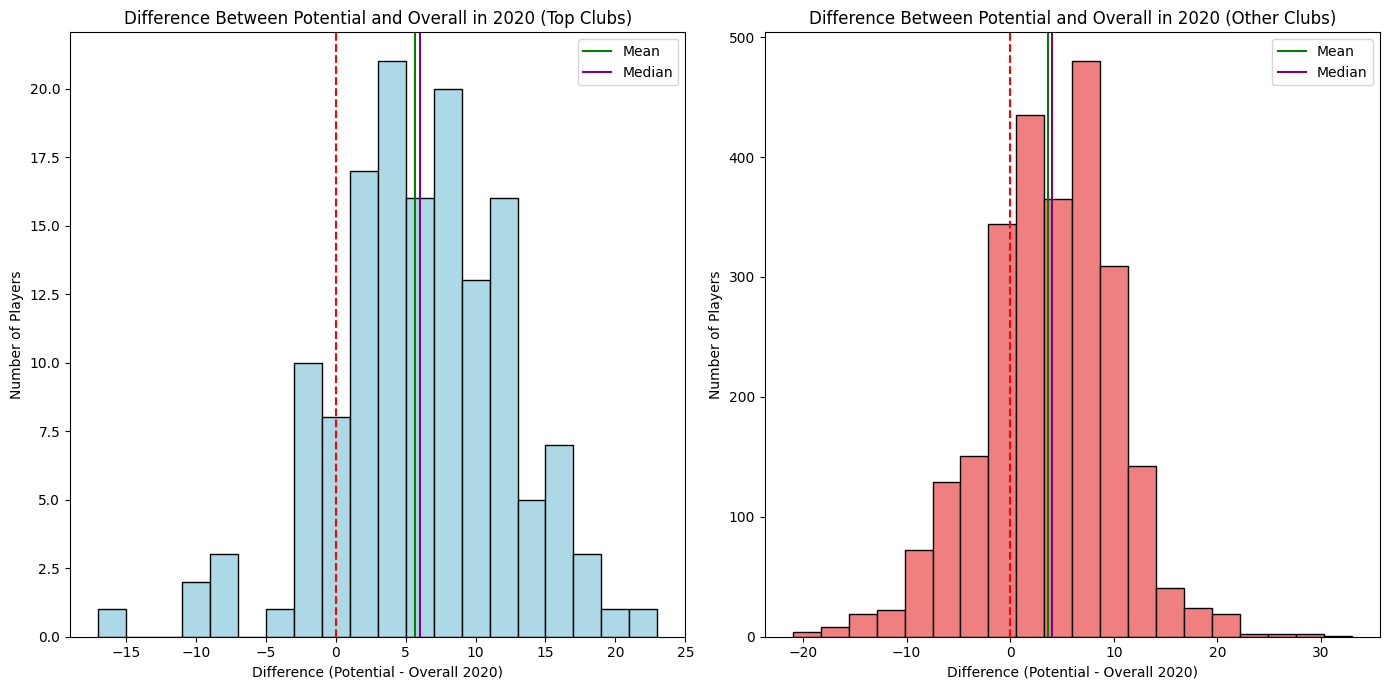

In [ ]:


conn = sqlite3.connect('/content/datasets/combined_fifa_players.csv')
c = conn.cursor()

results_all_players = c.execute("""
    SELECT *
    FROM players_combined
    WHERE club IN ( "Manchester City", "Real Madrid", "Inter", "Arsenal", "Bayer 04 Leverkusen", "Liverpool",
                    "FC Barcelona", "Atalanta", "Borussia Dortmund", "RB Leipzig", "Paris Saint-Germain",
                    "Bayern München II", "Sporting CP", "VfB Stuttgart", "PSV", "Atlético Madrid", "FC Porto",
                    "Girona FC", "Feyenoord", "SL Benfica")
""").fetchall()
df_all_players = df_with_titles(results_all_players, c)

results_all_players2 = c.execute("""
    SELECT *
    FROM players_combined
    WHERE club NOT IN ( "Manchester City", "Real Madrid", "Inter", "Arsenal", "Bayer 04 Leverkusen", "Liverpool",
                    "FC Barcelona", "Atalanta", "Borussia Dortmund", "RB Leipzig", "Paris Saint-Germain",
                    "Bayern München II", "Sporting CP", "VfB Stuttgart", "PSV", "Atlético Madrid", "FC Porto",
                    "Girona FC", "Feyenoord", "SL Benfica")
""").fetchall()
df_all_players2 = df_with_titles(results_all_players2, c)
df_all_players['difference'] = df_all_players['potential'] - df_all_players['overall_2020']
df_all_players2['difference'] = df_all_players2['potential'] - df_all_players2['overall_2020']

mean_top = df_all_players['difference'].mean()
median_top = df_all_players['difference'].median()

mean_other = df_all_players2['difference'].mean()
median_other = df_all_players2['difference'].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.hist(df_all_players['difference'], bins=20, color='lightblue', edgecolor='black')
ax1.axvline(0, color='red', linestyle='--')
ax1.axvline(mean_top, color='green', linestyle='-', label='Mean')
ax1.axvline(median_top, color='purple', linestyle='-', label='Median')
ax1.set_title('Difference Between Potential and Overall in 2020 (Top Clubs)')
ax1.set_xlabel('Difference (Potential - Overall 2020)')
ax1.set_ylabel('Number of Players')
ax1.legend()

ax2.hist(df_all_players2['difference'], bins=20, color='lightcoral', edgecolor='black')
ax2.axvline(0, color='red', linestyle='--')
ax2.axvline(mean_other, color='green', linestyle='-', label='Mean')
ax2.axvline(median_other, color='purple', linestyle='-', label='Median')
ax2.set_title('Difference Between Potential and Overall in 2020 (Other Clubs)')
ax2.set_xlabel('Difference (Potential - Overall 2020)')
ax2.set_ylabel('Number of Players')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
c = conn.cursor()
results = c.execute("""
    SELECT nationality, COUNT(nationality)
    FROM players
    WHERE age < 22 and overall >70
    GROUP BY nationality
    ORDER BY COUNT(nationality) DESC
""").fetchmany(32)


results_with_titles = df_with_titles(results, c)
results_with_titles

,nationality,COUNT(nationality)
0,Spain,38
1,Netherlands,22
2,Germany,20
3,France,20
4,Portugal,19
5,Brazil,19
6,England,15
7,Italy,14
8,Belgium,13
9,Argentina,13


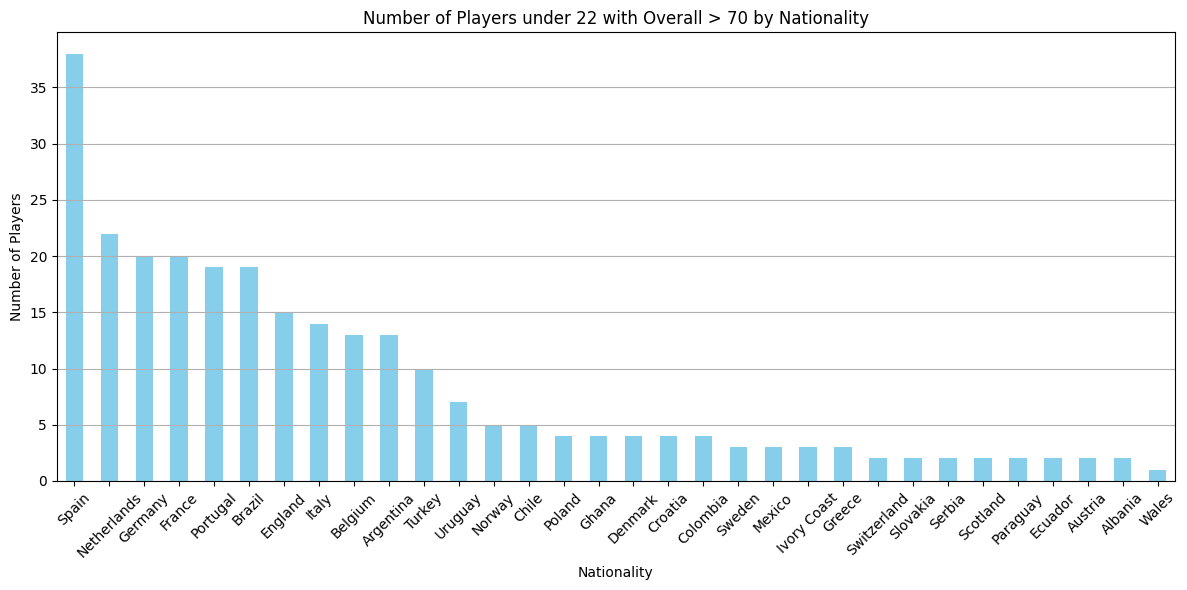

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
c = conn.cursor()

# Execute the query to fetch data
results = c.execute("""
    SELECT COUNT(nationality) AS count, nationality
    FROM players
    WHERE age < 22 AND overall > 70
    GROUP BY nationality
    ORDER BY count DESC
""").fetchmany(32)

# Convert the results into a DataFrame
df_potential_2016 = pd.DataFrame(results, columns=['Count', 'Nationality'])

# Close the connection
conn.close()

# Plotting the data
plt.figure(figsize=(12, 6))
df_potential_2016.set_index('Nationality')['Count'].plot(kind='bar', color='skyblue')
plt.title('Number of Players under 22 with Overall > 70 by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
c = conn.cursor()
results = c.execute("""
    SELECT nationality, COUNT(nationality)
    FROM players
    WHERE overall >60
    GROUP BY nationality
    ORDER BY COUNT(nationality) DESC
""").fetchmany(20)


results_with_titles = df_with_titles(results, c)
results_with_titles

,nationality,COUNT(nationality)
0,Spain,886
1,England,853
2,Argentina,828
3,France,680
4,Germany,531
5,Italy,529
6,Brazil,406
7,Colombia,383
8,Netherlands,322
9,Mexico,308


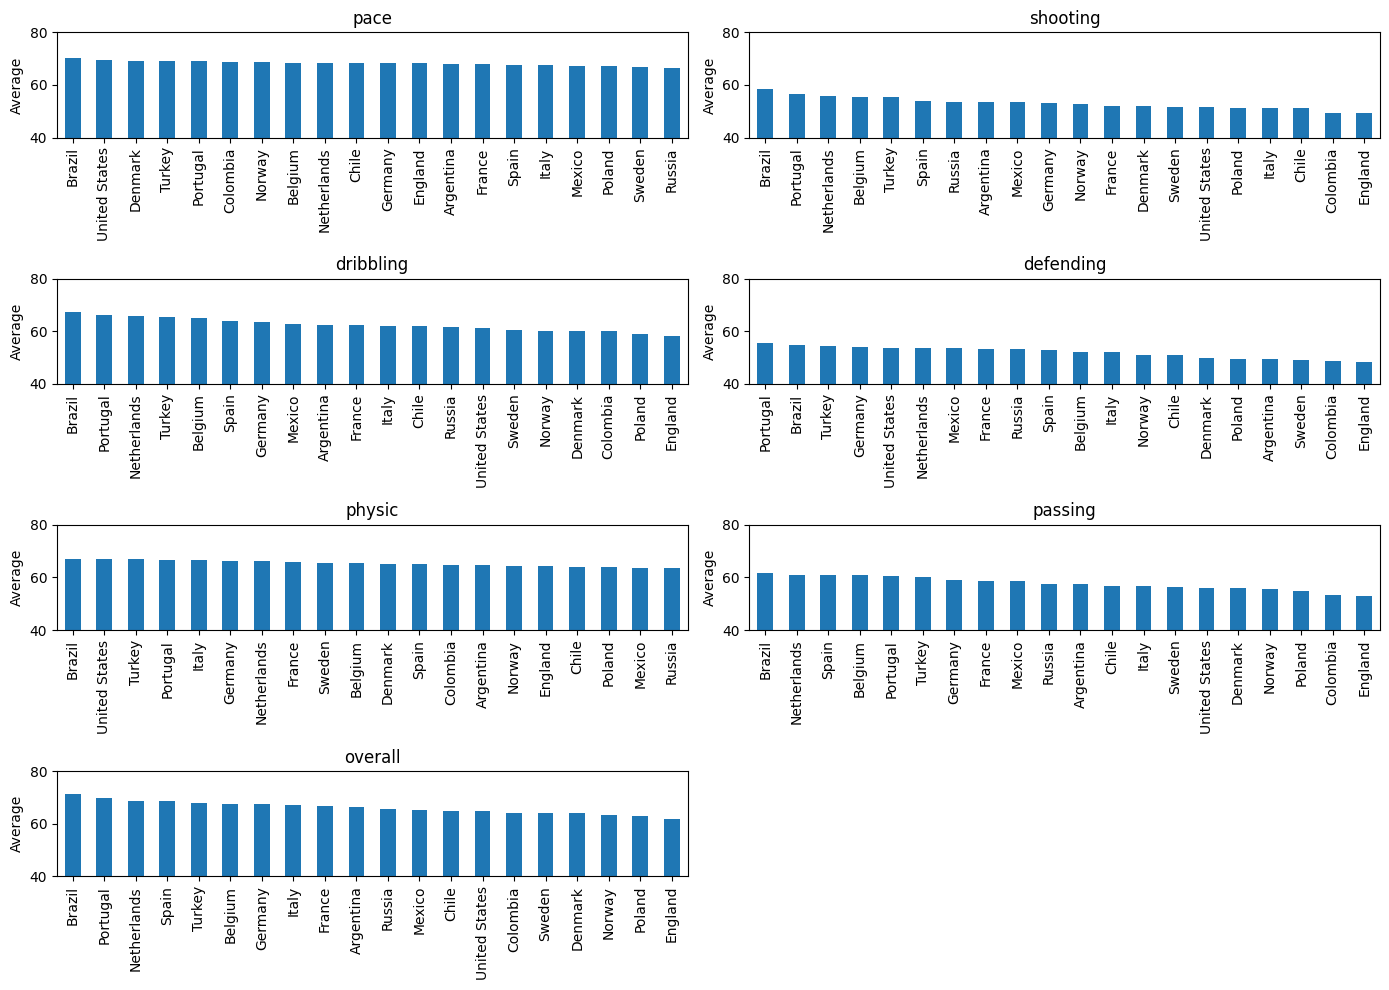

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

def calculate_averages():
    conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
    c = conn.cursor()
    results = c.execute("""
    SELECT nationality, COUNT(nationality)
    FROM players
    WHERE overall > 60
    GROUP BY nationality
    ORDER BY COUNT(nationality) DESC
    """).fetchmany(20)

    columns = [description[0] for description in c.description]
    conn.close()

    df_results = pd.DataFrame(results, columns=columns)

    return df_results['nationality'].tolist()

def get_averages_for_nationality(nationality):
    conn = sqlite3.connect('/content/datasets/fifa-20-complete-player-dataset/database.sqlite')
    query = f"""
    SELECT pace, shooting, dribbling, defending, physic, passing, overall
    FROM players
    WHERE nationality = '{nationality}'
    """
    data = pd.read_sql(query, conn)
    conn.close()

    if not data.empty:
        averages = data.mean()
    else:
        averages = pd.Series([0]*7, index=['pace', 'shooting', 'dribbling', 'defending', 'physic', 'passing', 'overall'])

    return averages

nationalities = calculate_averages()
all_averages = {}

for nationality in nationalities:
    all_averages[nationality] = get_averages_for_nationality(nationality)

data = pd.DataFrame(all_averages)

attributes = data.index

sorted_data = {}
for attribute in attributes:
    sorted_data[attribute] = data.loc[attribute].sort_values(ascending=False)

plt.figure(figsize=(14, 10))

for i, attribute in enumerate(attributes):
    plt.subplot(4, 2, i+1)
    sorted_data[attribute].plot(kind='bar')
    plt.title(attribute)
    plt.ylabel('Average')
    plt.ylim(40, 80)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
